## Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [2]:
df = pd.read_csv("Covid Dataset.csv")
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [3]:
df.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [4]:
#wearing masks and sanitization column had one value only which will be of no use hence dropping them
df.drop(["Wearing Masks","Sanitization from Market"], axis= 1, inplace = True)

## Converting Categorical data to numerical data

In [5]:
le=LabelEncoder()
df['Breathing Problem']=le.fit_transform(df['Breathing Problem'])
df['Fever']=le.fit_transform(df['Fever'])
df['Dry Cough']=le.fit_transform(df['Dry Cough'])
df['Sore throat']=le.fit_transform(df['Sore throat'])
df['Running Nose']=le.fit_transform(df['Running Nose'])
df['Asthma']=le.fit_transform(df['Asthma'])
df['Chronic Lung Disease']=le.fit_transform(df['Chronic Lung Disease'])
df['Headache']=le.fit_transform(df['Headache'])
df['Heart Disease']=le.fit_transform(df['Heart Disease'])
df['Diabetes']=le.fit_transform(df['Diabetes'])
df['Hyper Tension']=le.fit_transform(df['Hyper Tension'])
df['Fatigue ']=le.fit_transform(df['Fatigue '])

In [6]:
df['Gastrointestinal ']=le.fit_transform(df['Gastrointestinal '])
df['Abroad travel']=le.fit_transform(df['Abroad travel'])
df['Contact with COVID Patient']=le.fit_transform(df['Contact with COVID Patient'])
df['Attended Large Gathering']=le.fit_transform(df['Attended Large Gathering'])
df['Visited Public Exposed Places']=le.fit_transform(df['Visited Public Exposed Places'])
df['Family working in Public Exposed Places']=le.fit_transform(df['Family working in Public Exposed Places'])
df['COVID-19']=le.fit_transform(df['COVID-19'])
df['Sore throat']=le.fit_transform(df['Sore throat'])

In [7]:
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1


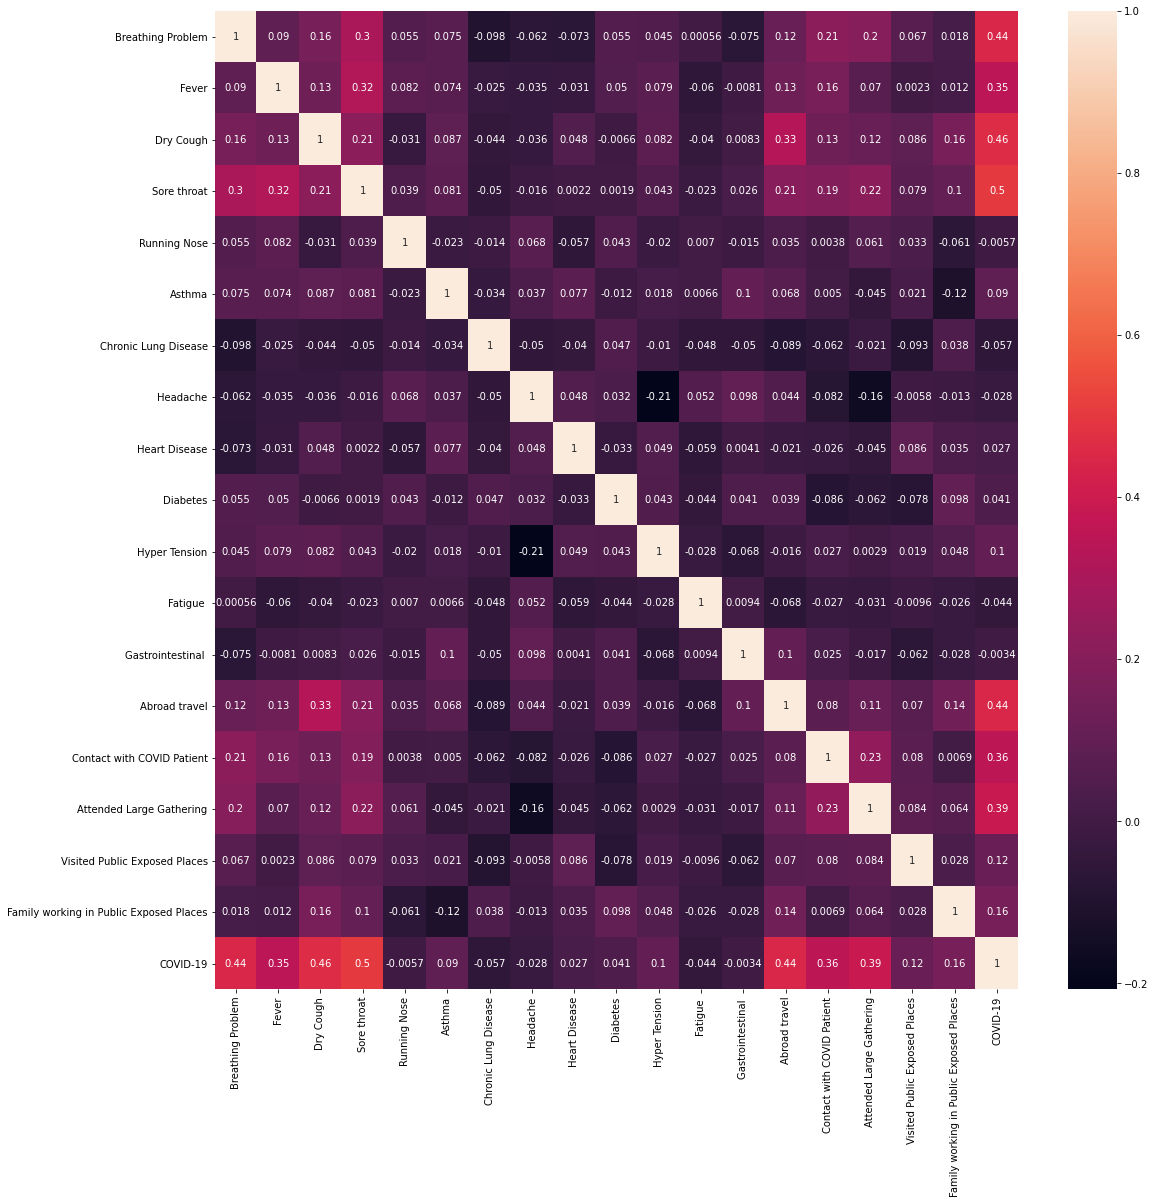

In [8]:
plt.figure(figsize =(18,18))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [9]:
x=df.drop('COVID-19',axis=1)
y=df['COVID-19']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [10]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_accuracy = knn.score(x_test, y_test)
knn_accuracy

0.9751609935602575

In [11]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[191  12]
 [ 15 869]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       203
           1       0.99      0.98      0.98       884

    accuracy                           0.98      1087
   macro avg       0.96      0.96      0.96      1087
weighted avg       0.98      0.98      0.98      1087



In [12]:
error = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

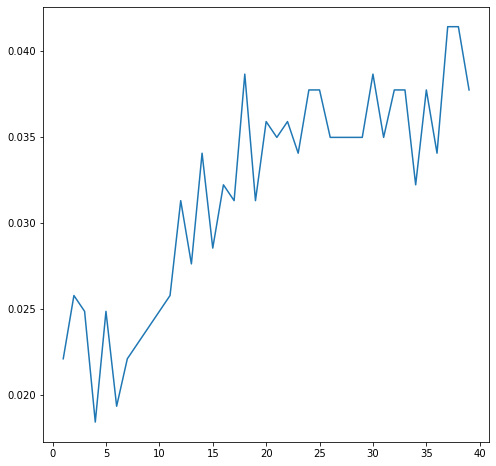

In [13]:
plt.figure(figsize = (8,8))
plt.plot(range(1,40), error)
plt.show()

### Since k = 4 is very close to 0 hence at this point we'll get great accuracy

In [17]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_accuracy = knn.score(x_test, y_test)*100
knn_accuracy

98.16007359705611

In [18]:
naive = GaussianNB()
naive.fit(x_train,y_train)
naive_accuracy = naive.score(x_test, y_test)*100
naive_accuracy

78.38086476540938

In [19]:
dt = tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
decision_accuracy = dt.score(x_test, y_test)*100
decision_accuracy

98.16007359705611